<h1>1. longest common substring</h1>

<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>

<h2>DP</h2>

Dynamic Programming can be used to find the longest common substring in O(m*n) time. The idea is to find the length of the longest common suffix for all substrings of both strings and store these lengths in a table. 
The longest common suffix has following optimal substructure property. 
If last characters match, then we reduce both lengths by 1 

LCSuff(X, Y, m, n) = LCSuff(X, Y, m-1, n-1) + 1 if X[m-1] = Y[n-1] 

If last characters do not match, then result is 0, i.e., 
LCSuff(X, Y, m, n) = 0 if (X[m-1] != Y[n-1])
Now we consider suffixes of different substrings ending at different indexes. 
The maximum length Longest Common Suffix is the longest common substring. 
LCSubStr(X, Y, m, n) = Max(LCSuff(X, Y, i, j)) where 1 <= i <= m and 1 <= j <= n 

In [3]:
def LCSubStr(X, Y, m, n):
    import numpy as np

    LCSuff = [[0 for k in range(n+1)] for l in range(m+1)]

    result = 0
 
    for i in range(m + 1):
        for j in range(n + 1):    #能遍历所有的
            if (i == 0 or j == 0):
                LCSuff[i][j] = 0
            elif (X[i-1] == Y[j-1]):  #为何是i-1，因为要找最长公共后缀而不是最长公共子串
                LCSuff[i][j] = LCSuff[i-1][j-1] + 1
                result = max(result, LCSuff[i][j])  #每次到这个If,代表更新了，更新了就要和之前的result比较
            else:
                LCSuff[i][j] = 0
    return np.matrix(LCSuff)
    #return result
 


In [4]:
X = 'OldSite:GeeksforGeeks.org'  #m=17 到第二个Geeks
Y = 'NewSite:GeeksQuiz.com'     #n=9 到第一个Geeks
 
m = len(X)
n = len(Y)
 
print(LCSubStr(X, Y, m, n))
#n=9, m=17出现了一个1，后面对角线是2345

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  4  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  7  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  1  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

<h1>2. longest palindromic substring</h1>

<h2>方法1：应用公共子串</h2>

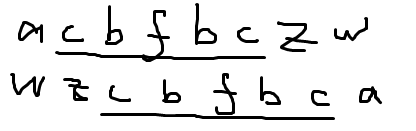

In [2]:
from IPython.display import Image
Image(filename="LCStr.png",height=500,width=500)

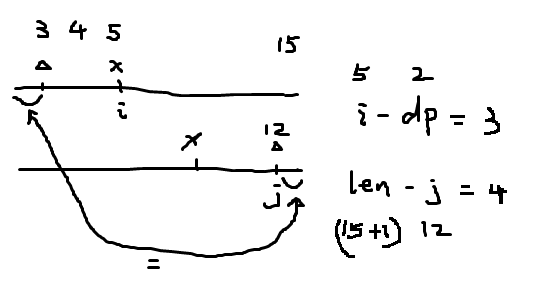

In [16]:
from IPython.display import Image
Image(filename="LCStr_indexmatch.png",height=500,width=500)

把原始字符串反过来找最大公共子串，但要注意找到的case有可能是刚好反过来能对上，比如abcdzzzydcba反过来是abcdyzzzdcba,最长子串为abcd，但显然最长回文是zzz,因此，找到每个case后，检查索引与原来索引一致与否

In [12]:
def LPalinStr(s):
    r=s[::-1]
    n=len(s)
    LCSuff = [[0 for k in range(n+1)] for l in range(n+1)]
    result = 0 
    for i in range(n + 1):
        for j in range(n + 1):      
            if (i == 0 or j == 0):
                LCSuff[i][j] = 0
            elif (s[i-1] == r[j-1]):  
                LCSuff[i][j] = LCSuff[i-1][j-1] + 1
                if i-LCSuff[i][j] + 1==len(s) - j:
                    if LCSuff[i][j]>result:    #只有比当前result大,才更新，才令max_end=i
                        result = LCSuff[i][j]
                        max_end=i
            else:
                LCSuff[i][j] = 0
    #return np.matrix(LCSuff)
    return s[max_end-result: max_end + 1]
 

In [2]:
s='ihdha'
s[2:3]

'd'

In [14]:
LPalinStr('acbfbczw')

'cbfbc'

<h2>方法2-dp</h2>

<p>实际上是reduce repeated computation in the brute force.</p>
<p>P(i, j)=(P(i+1, j-1) and s[i] == s[j])</p>
<p>The base cases are: </p>
<p>    P(i, i)=True</p>
<p>    P(i, i+1) = (s[i] == s[i+1])</p>

In [5]:
def longestPalindrome(s: str) -> str:
        if s == "":
            return s
        res = ""
        dp = [[None for i in range(len(s))] for j in range(len(s))]
        for j in range(len(s)):   
            for i in range(j+1):   #记住：这两层for能遍历所有的子串
                if i == j:
                    dp[j][i] = True
                elif j == i+1:
                    dp[j][i] = (s[i] == s[j])
                else:
                    dp[j][i] = (dp[j-1][i+1] and s[i] == s[j])
                if dp[j][i] and j - i + 1 > len(res):
                    res = s[i:j+1]
        return res

In [6]:
longestPalindrome('acbfbczw')

'cbfbc'

<h1>2. container with most water<h1/>

<h2>1.dp解法</h2>

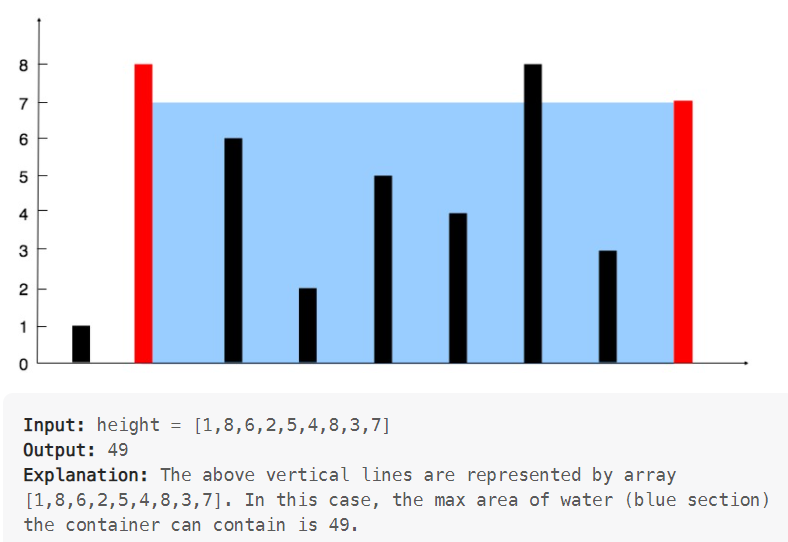

In [10]:
from IPython.display import Image
Image(filename="container.png",height=500,width=500)

思路：起初拿到，看看怎么分解为子问题递推式。随便固定两边，若右边往右，则要找最小的高，所以，keep a value "small" for the smallest height。又该如何遍历呢，感觉很像是最长公共子串的遍历方式

遍历容器右边，对于固定右边，往左找，遇到比它小的就按比它小的作为高，遇到比他大的就用它作为高

In [7]:
def maxArea(height):
    small=0      #set "small" to be the smaller edge of the container
    res=0
    for j in range(len(height)):
        for i in range(j):
            if height[i]<height[j]:
                small=height[i]
            elif height[i]>=height[j]:
                small=height[j]
            v=small*(j-i)
            res=max(res,v)
    return res

In [8]:
maxArea([1,8,6,2,5,4,8,3,7])

49

<h2>双指针</h2>

双同侧指针：https://leetcode.com/problems/remove-nth-node-from-end-of-list/submissions/870544193/

In [6]:
def maxArea(height) -> int:
        maxarea = 0
        left = 0
        right = len(height) - 1
        
        while left < right:
            width = right - left
            maxarea = max(maxarea, min(height[left], height[right]) * width)
            if height[left] <= height[right]:   #最小高的指针往内侧移
                left += 1
            else:
                right -= 1
                
        return maxarea

感觉是性质很强才能用双指针，也就是说，假如用了其他算法，你浪费掉了一些性质

第二想法，为什么这是对的吗，没有遗漏最优解吗？没有，比如说此时左高低，那么一定左减最优，因为左减和右减wide是一样的，那么右减的后续（红）有没有可能优于起初左减（绿）？有可能，但一定会被左减的后续遍历到

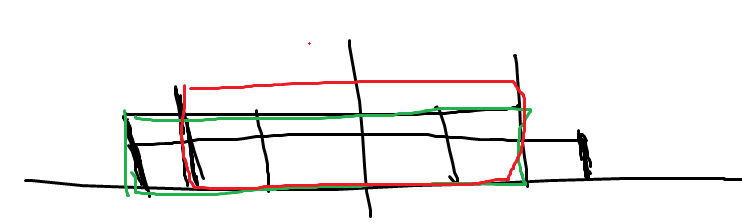

In [8]:
from IPython.display import Image
Image(filename="container2.png",height=500,width=500)

In [5]:
maxArea([1,8,6,2,5,4,8,3,7])

49

In [7]:
maxArea([15,14,1,2,3,4,5,6,7,8])

72

<h1>3. three sum</h1>

<h2>双指针</h2>

In [12]:
def threesum(nums):
    res=[]
    nums.sort()      #[-4,-2,-1,0,1,1,2,3,4,5]
    for i in range(len(nums)):
        if i>0 and nums[i]==nums[i-1]:  #skip the repeated one
            continue
        
        #for each i, use two-pointers and while loop to control
        l=i+1     #because i designates the most negative one
        r=len(nums)-1
        while(l<r):
                if nums[i]+nums[l]+nums[r]==0:
                    res.append([nums[i],nums[l],nums[r]])
                    l+=1    #left go up by 1  其实left无妨，只是force jumping to another res
                    while nums[l]==nums[l-1] and l<r: #while loop to skip the repeated one
                        l+=1   
                elif nums[i]+nums[l]+nums[r]>0:
                    r-=1
                else:
                    l+=1
        return res                     
        

为什么正确，因为被排序了，你认为不正确是因为你觉得指针有可能跑过了正确的pair（由于指针的性质，跑过了就不能回头）。但问题在于，有没有可能跑过呢，不可能，因为，一旦一个指针对准了pair解的其中一个，另一个指针的变动是对应的（比如右边往左移动刚移动完，那么有可能是小了或者对上了，那么左边一定增，增的话假如有的话就一定能找到，因为是升序的，假如有解一定在后面的序列里）

In [13]:
threesum([-4,-2,-1,0,1,1,2,3,4,5])

[[-4, -1, 5], [-4, 0, 4], [-4, 1, 3]]

<h1>4. letter combination of phone numbers </h1>

<h2>回溯法</h2>

In [3]:
def letterCombinations(digits):
        res=[]
        if digits =='':
            return []
        cor={'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
        for digit in digits:          #digit=2
            letters=list(cor[digit])  #[a,b,c]
            if res == []:        
                res=letters     #[a,b,c]
            else:                #[a,a,a,b,b,b,c,c,c]
                res2=[]
                for i in letters:       # d in [d,e,f]
                    for j in res:       # a in [a,b,c]
                        res2.append(j+i)
                res=res2
        return res

In [4]:
letterCombinations('23')

['ad', 'bd', 'cd', 'ae', 'be', 'ce', 'af', 'bf', 'cf']

<h2>recursive approach</h2>

In [1]:
class Solution(object):
    def letterCombinations(self, digits):
        if len(digits) == 0:
             return []
        characters = {2:"abc",3:"def",4:"ghi",5:"jkl",6:"mno",7:"pqrs",8:"tuv",9:"wxyz"}
        result = []
        self.solve(digits,characters,result)
        return result
    def solve(self, digits, characters, result, current_string="",current_level = 0):
        if current_level == len(digits):
            result.append(current_string)
            return
        for i in characters[int(digits[current_level])]:                          #i='d' in 'def'
            self.solve(digits,characters,result,current_string+i,current_level+1) #solve(23,[],d,1)，enter for-loop, solve(23,[],dp,2)


In [2]:
ob1 = Solution()
print(ob1.letterCombinations("37"))

['dp', 'dq', 'dr', 'ds', 'ep', 'eq', 'er', 'es', 'fp', 'fq', 'fr', 'fs']


In [ ]:
有点像DFS，想到了一定要用recursion，但没写出来
结构是：
class Solustion():
    def letterCombinations(self,digits):
       初始化
       self.solve(digits, cur_result,cur_string, cur_level)
    def solve(digits, cur_result,cur_string, cur_level):
       #recursion终止条件
       if ......:
          终止recursion，append进结果
       else则调用自身即:
          对于字母集里的每一个字母：
             调用自身

<h1>5.generate parentheses</h1>

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.
Input: n = 3
Output: ["((()))","(()())","(())()","()(())","()()()"]

<p><mark><strong>backtrack+recursion!!!!!!!</strong></mark></p>

In [8]:
def generateParenthesis(n):
    def dfs(left, right, s):
        #结束条件
        if len(s) == n * 2:
            res.append(s)
            print(s)
            return 

        if left < n: #左枝
            print(1)
            dfs(left + 1, right, s + '(')

        if right < left: #右枝
            print(2)
            dfs(left, right + 1, s + ')')

    res = []
    dfs(0, 0, '')
    return res

注意：先搞清楚，执行完树的左枝才能执行右枝，不可能存在同时执行，这个要搞清楚。比如第一个if条件进入了另一个dfs，那必须先把另一个dfs执行完，才能执行本dfs的下一个if。下图前面标有执行顺序

In [ ]:
                                                       (0, 0, '')
                                                           |
                                                       (1, 0, '(')              dfs[1,0,'('] 没有if
                                                      /           \
2 output:dfs[2,0,((]   1 input:dfs[1,0,(]no      (2, 0, '((')      (1, 1, '()')     5 input:dfs[1,0,(]  output:(1, 1, '()')
                                                  /                 \
3 output:dfs[2,1,(()]                      (2, 1, '(()')           (2, 1, '()(')      6 output:(2, 1, '()(')  
                                               /                       \
4 output:dfs[2,2,(())]                 (2, 2, '(())')                (2, 2, '()()')    7 output:(2, 2, '()()')
                                            |                             |
                                  res.append('(())')             res.append('()()')


In [10]:
generateParenthesis(2)

1
1
2
2
(())
2
1
2
()()


['(())', '()()']

这种Backtrack的方式是在上层用if留了一个枝条给后续，遍历到下层后，返回到这个枝条（DFS），其他的backtrack可能会用pop之类的

<h1>6.combination sum</h1>

<p><mark><strong>backtrack+recursion!!!!!!!</strong></mark></p>

In [2]:
def combinationSum(arr, target):

        def findNumbers(ans, arr, temp, target, index):
        
            if(target == 0):
                
                # Adding deep copy of list to ans
                ans.append(list(temp))   #一般来说，temp都要作为recursion function的一个参数
                return
            
            # Iterate from index to len(arr) - 1
            for i in range(index, len(arr)):

                # checking that target does not become negative
                if(target - arr[i]) >= 0:

                    # adding element which can contribute to
                    # sum
                    temp.append(arr[i])
                    findNumbers(ans, arr, temp, target-arr[i], i)

                    # removing element from list (backtracking)
                    temp.remove(arr[i])
        
        ans = []
        temp = []

        # removing the duplicates using Set and
        # Sorting the List
        arr = sorted(list(set(arr)))
        findNumbers(ans, arr, temp, target, 0)
        return ans


之前的recursion不存在backtrack过程，因为不需要

In [ ]:
这种backtrack和上一题不一样，需要手动加remove这一步，结构为：
def recur(temp, globalPara, currentPosition):
    if ...:
        #终止条件
        return
    for i in range...:
        append
        recur() #调用自身，因此如果满足则触发终止条件append进global
        remove  #移出，以便访问下一个

In [ ]:
r代表remove
([],[2],6,0)r, ([],[2,2],4,0)r, ([],[2,2,2],2,0)r, ([],[2,2,2,2],0,0)r, [[2,2,2,2]]

([],[2,2,2,2],0,0)r -> ([],[2,2,2],2,0): index=1,2,3无法满足(探索了这枝，但返回了)

([],[2,2,2],2,0)r -> ([],[2,2],4,0)r: index=1无法满足，index=2([],[2,2,4],0,2)r, [[2,2,2,2], [2,2,4]]
    
([],[2,2],4,0)r -> ([],[2],6,0): 找到3,3，remove回来，找到6，remove回来

In [3]:
combinationSum([2,3,4,6], 8)

[[2, 2, 2, 2], [2, 2, 4], [2, 3, 3], [2, 6], [4, 4]]

<h1>7.for greedy algorithm visit:</h1>

https://leetcode.com/problems/jump-game-ii/solutions/3000282/jump-game-ii/
看那个动画演示

the current jump ends when we reach index end. Between the current index and end, we find the farthest reachable index far. At the end of the current jump, we increment our answer and set end = far for the next jump.

<h1>8.permutation</h1>

<p><mark><strong>backtrack!!!!!!!</strong></mark></p>

Any situation where we might need to access a previous state of a variable that keeps changing during the execution of the program requires backtracking

In [13]:
def permute(nums):
    def recursive(nums, perm=[], res=[]): #perm就是temp
        if not nums:    #if nums为空
            res.append(perm[::]) 

        for i in range(len(nums)):     #1 in [1,2,3]                  #2 in [2,3]     3 in [3]
            newNums = nums[:i] + nums[i+1:]   #[2,3]                    #[3]            []
            perm.append(nums[i])      #[1]                             #[1,2]          [1,2,3]
            recursive(newNums, perm, res)   # [2,3],[1],[]          [3],[1,2],[]    [],[1,2,3],[]
            perm.pop()              #            ?                        ?            [1,2] [1],re([2],[1,3],res) 
        return res                                                                             # re([],[1,3,2],res)

    return recursive(nums)

In [14]:
permute([1,3,5])

[[1, 3, 5], [1, 5, 3], [3, 1, 5], [3, 5, 1], [5, 1, 3], [5, 3, 1]]

In [ ]:
需要手动加remove这一步，结构为：
def recur(temp, globalPara):
    if ...:
        #终止条件
        return
    for i in range...:
        append
        recur() #调用自身，因此如果满足则触发终止条件append进global
        remove  #移出，以便访问下一个

<h1>9.group Anagrams</h1>

In [1]:
import collections
def groupAnagrams(strs):      
    ans = collections.defaultdict(list)   #此字典的值是列表类型
    for s in strs:     #["eat","tea","tan","ate","nat","bat"]
        ans[tuple(sorted(s))].append(s)
    return ans.values()

In [2]:
groupAnagrams(["eat","tea","tan","ate","nat","bat"])

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

<h1>10.maximum subarray</h1>

<h2>错误答案：双指针</h2>

In [14]:
def lsum(nums):
    l=0
    r=len(nums)-1
    s=sum(nums[l:r+1])
    print(s)
    while l<r:
        if nums[l]>=nums[r]:
            r-=1
            s=max(s,sum(nums[l:r+1]))
            print(l,r,s)
        else:
            l+=1
            s=max(s,sum(nums[l:r+1]))
            print(l,r,s)
    s=max(s,nums[r],nums[l])
    return s
    

In [12]:
lsum([1,2,-1,-2,2,1,-2,1,4,-5,4])

5
1 10 5
2 10 5
3 10 5
4 10 5
5 10 5
6 10 5
7 10 5
8 10 5
8 9 5
8 8 5


5

<p>错误原因：右指针一直为4大于左边的一切（1或者2），然而左边一直在减小。</p>
<p style="color: red;">要能自己举出错误例子</p>

<h2>recursive approach</h2>

In [5]:
#把问题缩减成找subarray的max subarray
#比如说原来要找arr[0:]的max subarray, 转换为找arr[1:]的max subarray，再转为找arr[2:]的max subarray......
def maxSubArray(nums):
    #calculates the maximum subarray sum starting from index i 
    def solve(i, must_pick):
        if i >= len(nums): #exceeds length
            if must_pick:
                return 0 
            else:
                return float("-inf")
        return max(nums[i] + solve(i+1, True), 0 if must_pick else solve(i+1, False))
        #that is return max(必须选0，一定不选0)
        #if must pick, return 必须选的值（如果小于0则取0）
        # nums[i]表示当前值add to result, result即solve(i+1,True),由于是连续的，当前选的话，右边的也得选
    return solve(0, False)    

In [6]:
maxSubArray([1,2,-1,-2,2,1,-2,1,4,-5,4])

6

<p style="color: red;">如何快速理解别人代码：（1）看看最后的return （2）回到相应的地方 （3）看进入哪个if条件 （4）记住第一步永远是先从代码行去理解，再从宏观角度理解逻辑，这样大大节约了时间<p>

In [ ]:
浏览顺序：先左列从上到下，再右列从下到上
假如只有三个元素[1,2,-1]    
    
不一定选0：solve(0, False): 
max(选0：nums[0]+solve(1,True), 不选0：solve(1,False))     max(1+2, 2)=3

    
solve(1, True):
max(nums[1]+solve(2, True), 0)      max(2,0)=2
    
solve(1, False):
max(nums[1]+solve(2,True), solve(2,False))    max(2,-1)=2
    
solve(2, True):
max(nums[2]+solve(3, True), 0)          max(-1,0)=0
    
solve(2, False):
max(nums[2]+solve(3,True), solve(3,False))    max(-1, -inf)=-1


                                                f(0, False)                       🔽 => repeated calculations
					                          /             \ 
                       		       f(1, False)              f(1, True)
			                      /          \       🔽          \      🔽
			                 f(2, False)      f(2, True)           f(2, True)
							/            \  🔽       \   🔽           \  🔽
						f(3, False)   f(3,True)     f(3, True)           f(3, True)
						/        \            \           \                  \
				      ...        ...          ...         ...                ...

"""becasue of the repeated calculation, we can use memoization technique here to make our solution more efficient. 
Here, we use a dp array where dp[mustPick][i] denotes the maximum sum subarray ending at (note that in recursion method
it is "starting from") i and mustPick denotes whether the current element must be picked compulsorily or not."""

<h2>DP approach</h2>

<p>Whenever you see a question that asks for the maximum or minimum of something, consider Dynamic Programming as a possibility</p>
<p>这是一个比较难的DP问题</p>
<p>dp[1][i] denotes maximum subarray sum ending at i (including nums[i]) and dp[0][i] denotes maximum subarray sum upto i (may or may not include nums[i])</p>
<p>dp[1][i]=max(nums[i],  dp[1][i-1] + nums[i])</p>
<p>dp[0][i]=max(dp[0][i-1],  dp[1][i])</p>

In [14]:
def maxSubArray(nums):
    dp = [[0]*len(nums) for i in range(2)]
    dp[0][0], dp[1][0] = max(0,nums[0]), nums[0]
    for i in range(1, len(nums)):
        dp[1][i] = max(nums[i], nums[i] + dp[1][i-1])
        dp[0][i] = max(dp[0][i-1], dp[1][i])
    return dp[0][-1]

In [15]:
print([0]*5)

[0, 0, 0, 0, 0]


In [16]:
maxSubArray([1,2,-1,-2,2,1,-2,1,4,-5,4])

6

In [17]:
maxSubArray([-2,1,-3,4,-1,2,1,-5,4])
#this case in dp[1][1] is the reason why dp[1][i] = max(nums[i], nums[i] + dp[1][i-1])

6

In [3]:
#那为什么不能dp[1][i] = nums[i] + dp[0][i-1]？
#因为必选不能调用不必选的结果，要考虑连续性的问题
#见下图
def maxSubArray(nums):
    dp = [[0]*len(nums) for i in range(2)]
    dp[0][0], dp[1][0] = max(0,nums[0]), nums[0]
    for i in range(1, len(nums)):
        dp[1][i] = nums[i] + dp[0][i-1]
        dp[0][i] = max(dp[0][i-1], dp[1][i])
    return dp[0][-1]

In [2]:
maxSubArray([1,2,-1,-2,2,1,-2,1,4,-5,4])

15

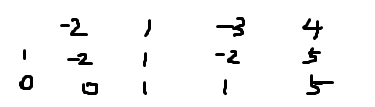

In [6]:
from IPython.display import Image
Image(filename="msubarray.png",height=250,width=250)

4这里的第一行调用了dp[0][-3]，然而，1这个结果来源于不选-3，中断了，不能再往后连了

<h1>11.spiral matrix</h1>

In [4]:
def spiral(m):
    hbound=len(m[0])-1   #3
    vbound=len(m)-1      #2
    res=[]
    while hbound>0 or vbound>0:
        for i in range(len(m[0])-1-hbound,hbound+1):
            res.append(m[len(m)-1-vbound][i])
            #print(1111,len(m[0])-1-hbound,hbound+1,res)
        vbound-=1
        
        for i in range(len(m)-1-vbound,vbound+1+1):
            res.append(m[i][hbound])
            #print(2222,len(m)-1-vbound,vbound+1+1,res)
        hbound-=1
        
        for i in range(hbound,len(m[0])-1-hbound-1-1,-1):
            res.append(m[vbound+1][i])
            #print(3333,hbound,len(m[0])-1-hbound-1-1,res)

        for i in range(vbound,len(m)-1-vbound-1,-1):
            res.append(m[i][len(m[0])-1-(hbound+1)])
            #print(4444, vbound,len(m)-1-vbound-1,res)
    res.pop()
    if len(m[0])-1==3:
        res.pop()
    return res

In [5]:
for i in range(5,1,-1): 
    print(i)

5
4
3
2


In [7]:
#spiral([[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30]])

<p>注意分析方法：由于绕一圈来讲，4个for range循环的Bound肯定一样，所以循环前变量只用设置两个，即vertical bound 和horizontal bound</p>

<p>然而，以上方法是错误的，无法解决循环的结束条件问题，所以采用pop的方法，如下</p>

In [1]:
def spiralOrder(matrix):
        result = []
        while matrix:
            result += matrix.pop(0) # 1

            if matrix and matrix[0]: # 2 
                for line in matrix:
                    result.append(line.pop())

            if matrix: # 3
                result += matrix.pop()[::-1]

            if matrix and matrix[0]: # 4
                for line in matrix[::-1]:
                    result.append(line.pop(0))
        return result

In [8]:
#spiralOrder([[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30]])

<h1>11.unique path</h1>

<h2>brute force</h2>

<p>跟leetcode70-climbing stairs相似</p>

In [10]:
def uniquePaths(m, n, i=0, j=0):
    if i >= m or j >= n:      return 0
    if i == m-1 and j == n-1: return 1
    return uniquePaths(m, n, i+1, j) + uniquePaths(m, n, i, j+1)

In [11]:
uniquePaths(3,7)

28

In [12]:
uniquePaths(3,2)

3

<p>however, many cells computed again and again, so:</p>

<h2>Dynamic Programming - Memoization</h2>

In [15]:
def uniquePaths(m, n):
    from functools import cache
    @cache
    def dfs(i, j):
        if i >= m or j >= n:      return 0
        if i == m-1 and j == n-1: return 1
        return dfs(i+1, j) + dfs(i, j+1)
    return dfs(0, 0)
#先compute dfs(i+1, j)，再compute dfs(i, j+1),  dfs(i+1, j)的一些后续值可以也会在compute dfs(i, j+1)里

In [16]:
uniquePaths(3,7)

28

<h2>Dynamic Programming - Tabulation</h2>

In [38]:
def uniquePaths(m,n):
    dp=[[1]*n for j in range(m)]
    for i in range(m):
        for j in range(n):
            if i!=0 and j!=0:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    return dp[-1][-1]
    #相当于起点在右下角，终点在左上角    

In [39]:
uniquePaths(3,7)

28

<p>看似是一样的formula，但思路不一样，recursion是把所有情况以二叉树形式展开，找到能到达的则叶子几点为1，计算为1的数量。而dp考虑的是到(i,j)可能由(i-1,j)到也可能由于(i,j-1)到</p>

In [15]:
#回忆quicksort

In [4]:
def partition(a,p,q):
    X=p
    i=p
    j=i+1
    while j<=q:
        if a[j]<a[X]:
            i+=1
            a[i],a[j]=a[j],a[i] 
        j+=1
    a[X],a[i]=a[i],a[X]
    return i

def quicksort(a,p,q):
    if p<q:
        m=partition(a,p,q)  #[3,4,...6...7,11,7]
        quicksort(a,p,m-1)   #[3,4,...] to [...x...6...7,11,7]  
        quicksort(a,m+1,q)   #[...7,11,7] to [...x...6...y...]
    return a
         
quicksort([0,2,1],0,2)       


[0, 1, 2]

<h1>12.subset</h1>

<h2>Cascading</h2>

<p>问题就在于要想到这样写，而且用substitution来proof为什么这样是对的</p>

In [ ]:
#要想到这是cascading的结构

In [16]:
def subsets(nums):
    n = len(nums)
    output = [[]]

    for num in nums:
        output += [curr + [num] for curr in output]
        # []+[1],     []+[2],[1]+[2]
        # [], [1]     [2], [1,2]
    return output


In [17]:
subsets([1,2,3])

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

<h2>backtrack</h2>

<p><mark><strong>backtrack+pop!</strong></mark></p>

In [ ]:
能想到用backtrack，但注意此例中backtrack的终止条件是变的，所以用k来控制curr的长度，for循环下backtrack

In [13]:
class Solution:
    def subsets(self, nums):
        def backtrack(first = 0, curr = []):
            # if the combination is done
            if len(curr) == k:  
                output.append(curr[:])
                return
            for i in range(first, n):
                # add nums[i] into the current combination
                curr.append(nums[i])
                # use next integers to complete the combination
                backtrack(i + 1, curr)
                # backtrack
                curr.pop()
        
        output = []
        n = len(nums)
        for k in range(n + 1):  
            backtrack()
        return output
    # k=2  for 0 range(0,n), cur=[1], backtrack(1,[1]), pop
    # for 1 in range(1,n), cur=[1,2], backtrack(2,[1,2]),pop
    # append([1,2]), pop: cur=[1], for 2 in range(1,n), cur=[1,3], backtrack(2,[1,3])
    # append([1,3]), pop, pop, cur=[], for 1 in range(0,3), cur=[2], backtrack(2,[2]),pop
    # append([2,3]),pop

In [14]:
sol=Solution()
sol.subsets([1,2,3])

[[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

<h1>13.word search</h1>

<p><mark><strong>backtrack+DFS!</strong></mark></p>

In [17]:
def exist(board, word):
    rows= len(board)
    cols=len(board[0])
    def dfs(row, col, count):
        #if current position out of bound
        if row<0 or row==rows or col<0 or col==cols:
            return False
        #if do not match 
        #or visited!!!  
        if board[row][col] != word[count] or board[row][col] == 'V':
            return False
        if count==len(word)-1:
            return True
        cache= board[row][col]
        board[row][col] = 'V'
        #上下左右有一个true就可以往下走
        result=dfs(row+1, col, count+1) or dfs(row-1, col, count+1) or dfs(row, col+1, count+1) or dfs(row, col-1, count+1)
        board[row][col]= cache
        
        return result
    return any(dfs(row, col, 0) for row in range(rows) for col in range(cols))
    

图论里DFS的模板为：if到边界：false，终止；if不满足条件：false，终止；如果满足：true，终止，剩下的情况即是一条可能的潜在通往正确解的路径的图中，要留这么一个else的口子，让函数不断调用自身

In [18]:
exist([["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]],'SEE')

True

<h1>121. best time to buy and sell stock</h1>

你只能选择 某一天 买入这只股票，并选择在 未来的某一个不同的日子 卖出该股票。设计一个算法来计算你所能获取的最大利润。
返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。

In [ ]:
#one pass
#maintain 2 variable, min_price and the corresponding max_profit
#如果小于最低价就更新最近低价，如果大于那么就更新最大利润
#算法是正确的，因为高价必须要在低价之后
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        min_price = float('inf')
        max_profit = 0
        for i in range(len(prices)):
            if prices[i] < min_price:
                min_price = prices[i]
            elif prices[i] - min_price > max_profit:
                max_profit = prices[i] - min_price
            else:
                pass
        return max_profit

<h1>121. best time to buy and sell stock 2</h1>

could be like buy-sell-then-buy-then-sell, could buy and sell on same day, what is the best profit

In [1]:
#brute force
class Solution:
    def maxProfit(self, prices):
        return self.calculate(prices, 0)
    
    def calculate(self, prices, s):
        if s >= len(prices):
            return 0
        max_profit = 0
        for start in range(s, len(prices)):
            maxprofit = 0
            for i in range(start + 1, len(prices)):
                if prices[start] < prices[i]:
                    profit = self.calculate(prices, i + 1) + prices[i] - prices[start]
                    if profit > maxprofit:
                        maxprofit = profit
            if maxprofit > max_profit:
                max_profit = maxprofit
        return max_profit

In [2]:
sol=Solution()
sol.maxProfit([7,1,5,3,6,4])

7

In [3]:
#Peak Valley Approach
class Solution:
    def maxProfit(self, prices):
        i = 0
        valley = prices[0]
        peak = prices[0]
        maxprofit = 0
        while i < len(prices) - 1:
            while i < len(prices) - 1 and prices[i] >= prices[i + 1]:
                i += 1
            valley = prices[i]
            while i < len(prices) - 1 and prices[i] <= prices[i + 1]:
                i += 1
            peak = prices[i]
            maxprofit += peak - valley
        return maxprofit

In [4]:
sol=Solution()
sol.maxProfit([7,1,5,3,6,4])

7

In [6]:
class Solution:
    def maxProfit(self, prices) -> int:
        profit = 0
        for i in range(1,len(prices)):
            profit += max(0,prices[i]-prices[i-1])
        return profit

In [7]:
sol=Solution()
sol.maxProfit([7,1,5,3,6,4])

7

<h1>131. Palindrome Partitioning</h1>

<p><mark><strong>Backtracking with Dynamic Programming!</strong></mark></p>

recursively expand potential candidates--> until final goal is achieved-->backtrack to get the next potential

1.Iteratively generate all possible substrings beginning at index "start". The index "end" increments from "start" until the end of the string.

2.For each of the substrings generated, check if it is a palindrome.

3.If the substring is a palindrome, the substring is a potential candidate. Add the substring to the "currentList" and perform a depth-first search on the remaining substring. If the current substring ends at index "end", "end+1" becomes the "start" index for the next recursive call.

4.Backtrack if "start" index is greater than or equal to the string length and add the "currentList" to the result.

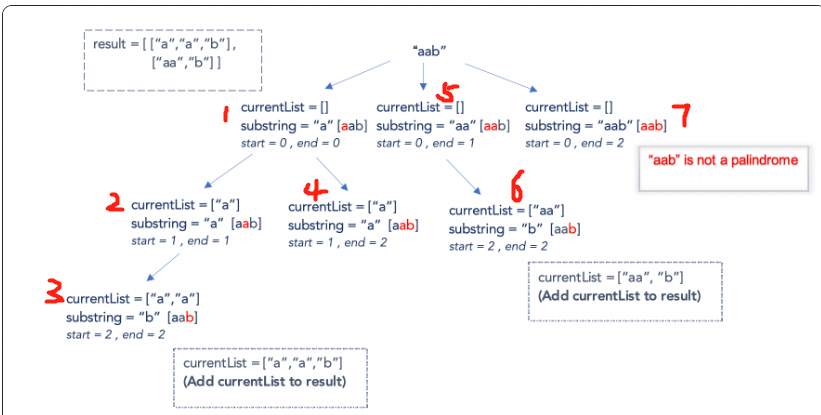

In [3]:
from IPython.display import Image
Image(filename="pali_partition.png",height=800,width=800)

In [4]:
class Solution:
    def partition(self, s: str):
        if len(s) == 1: return [[s]]
        #dp[i][i] refers to start and end
        dp = [[False for i in range(len(s))] for i in range(len(s))]
        for i in range(len(s)):
            dp[i][i] = True
            if i < len(s) - 1 and s[i] == s[i + 1] :
                dp[i][i + 1] = True
        for l in range(3, len(s) + 1):   # l refers to the length of the substring
            for i in range(len(s) - l + 1):  # i refers to the start point of substring
                if s[i] == s[i + l - 1]:  #if start string and end string equal
                    dp[i][i + l - 1] = dp[i + 1][i + l - 2]
        #from this we learn that DP table index could be different from loop index
        #print(dp)
        res = []
        def dfs(i, curr):   # i is the start index
            #print(i, curr)
            if i == len(s):    #ending condition of the recursion
                res.append(curr.copy())
                return
            for j in range(i, len(s)): #遍历end指针
                if dp[i][j]:
                    curr.append(s[i: j + 1])
                    dfs(j + 1, curr)  #start=end+1
                    curr.pop()
            return
        
        dfs(0, [])
        return res

<p style="color: red;">注意这种recursion的结构，把start指针传入dfs，dfs的循环内end指针往后走，找到后start=end+1</p>

In [5]:
sol=Solution()
sol.partition('aab')

[[True, True, False], [False, True, False], [False, False, True]]


[['a', 'a', 'b'], ['aa', 'b']]

<h1>139. Word Break</h1>

不要求字典中出现的单词全部都使用，并且字典中的单词可以重复使用

这个题和上面的题的思路一样，都是一类string break，word break的题，记住模板即可

<h2> recursion with memoization</h2>

<p style="color: red;">可以和上一个题一样，也使用这种recursion的结构:把start指针传入dfs，dfs的循环内end指针往后走，找到后start=end+1</p>
<p>每种“是否能把大结构拆解成某种小结构的组合的题，都适用”</p>

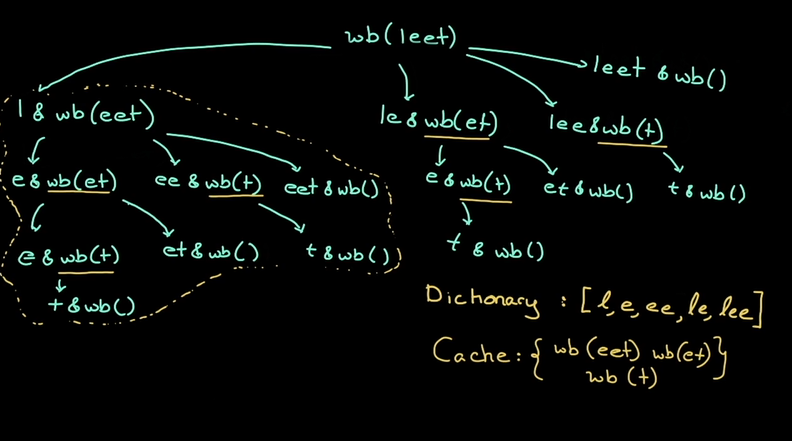

In [7]:
from IPython.display import Image
Image(filename="word_break.png",height=700, width=700)

In [14]:
class Solution:
    def wordBreak(self, s, wordDict):
        from functools import lru_cache
        @lru_cache   #如果请求该函数的传参未变则直接返回缓存起来的结果而不再执行函数
        def wordBreakMemo(s, word_dict, start):   #def 里的def不该有self
            if start == len(s):
                return True     #对应上图的 wb()
            for end in range(start + 1, len(s) + 1):
                if s[start:end] in word_dict and wordBreakMemo(s, word_dict, end):
                    return True
            return False

        return wordBreakMemo(s, frozenset(wordDict), 0) #冻结集合不能删除和添加任何元素


In [15]:
sol=Solution()
sol.wordBreak("leetcode", ["leet","code"])

True

<h2>Dynamic Programming</h2>

In [ ]:
class Solution:
    def wordBreak(self, s, wordDict):
        word_set = set(wordDict)
        dp = [False] * (len(s) + 1)
        dp[0] = True

        for i in range(1, len(s) + 1):
            for j in range(i):
                if dp[j] and s[j:i] in word_set: #true是出现在前面true的基础上的
                    dp[i] = True
                    break
        return dp[len(s)]

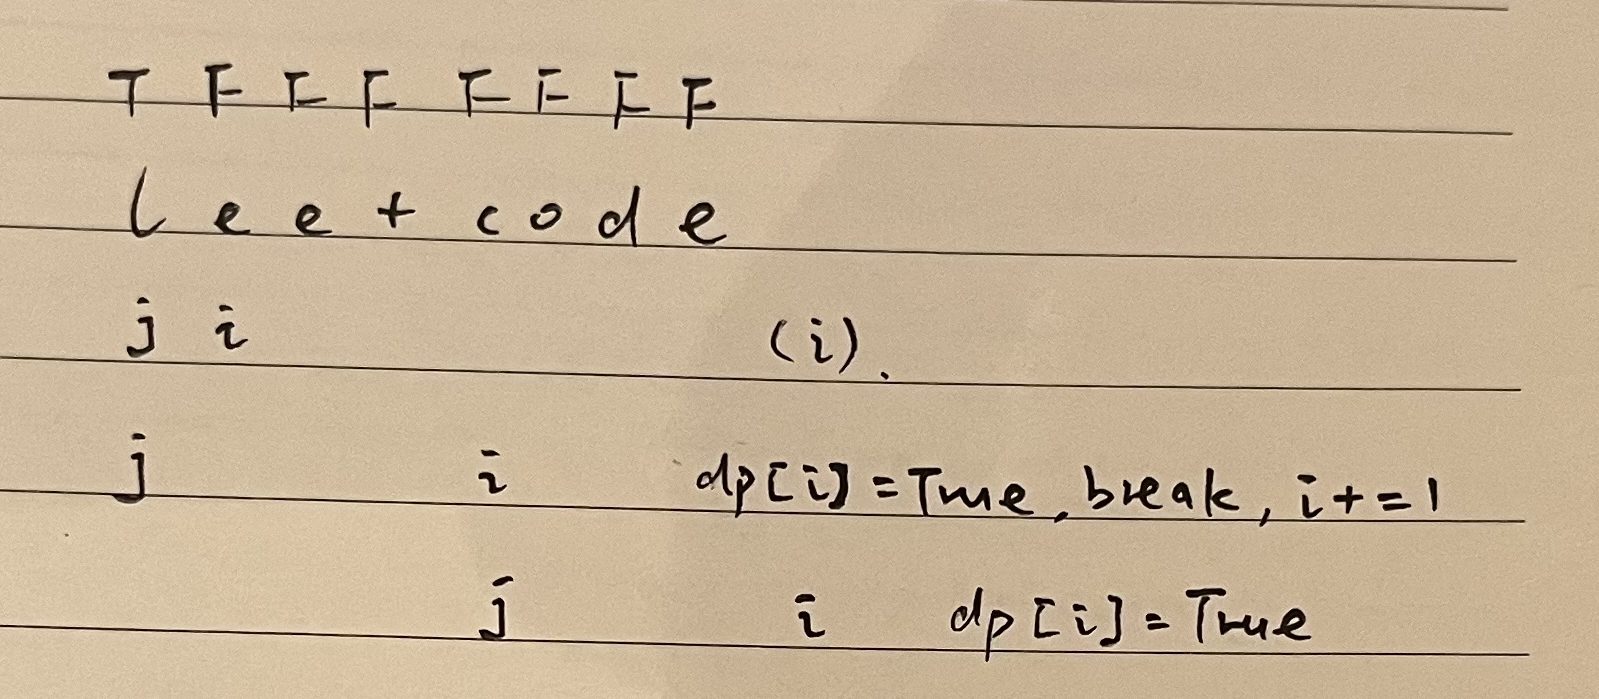

In [18]:
from IPython.display import Image
Image(filename="wb_dp.jpg",height=400, width=400)